## 1. 데이터 불러오기

In [1]:
import pandas as pd

df=pd.read_csv("train.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
df_test=pd.read_csv("test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 2. EDA 및 전처리

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
import matplotlib.pyplot as plt
import numpy as np

0    549
1    342
Name: Survived, dtype: int64


<BarContainer object of 2 artists>

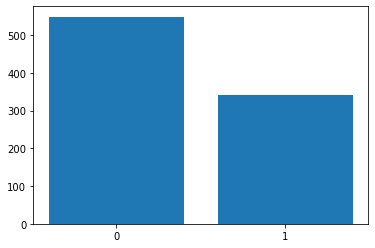

In [10]:
print(df["Survived"].value_counts())
d_cnt=df.loc[df['Survived']==0, 'PassengerId'].count()
s_cnt=df.loc[df['Survived']==1, 'PassengerId'].count()
plt.bar(["0","1"], [d_cnt, s_cnt])

<AxesSubplot:xlabel='Survived', ylabel='count'>

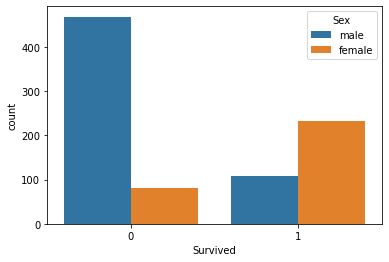

In [11]:
import seaborn as sns

sns.countplot(data=df, x='Survived', hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

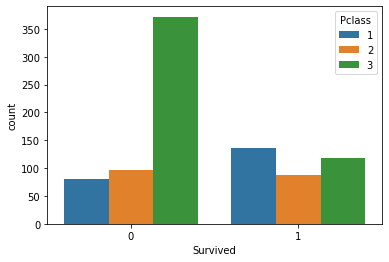

In [12]:
sns.countplot(data=df, x='Survived', hue='Pclass')

<AxesSubplot:xlabel='Survived', ylabel='count'>

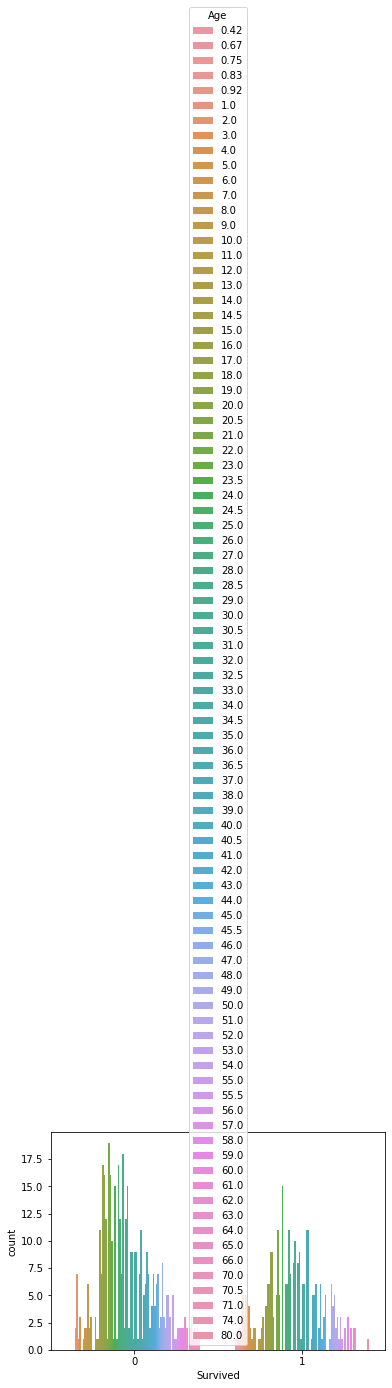

In [13]:
sns.countplot(data=df, x='Survived', hue='Age')

In [14]:
df.loc[df["Age"]<10,"Age"]=0
df.loc[(df["Age"]>=10)&(df["Age"]<20),"Age"]=1
df.loc[(df["Age"]>=20)&(df["Age"]<30),"Age"]=2
df.loc[(df["Age"]>=30)&(df["Age"]<40),"Age"]=3
df.loc[(df["Age"]>=40)&(df["Age"]<50),"Age"]=4
df.loc[df["Age"]>=50,"Age"]=5

In [15]:
df_test.loc[df_test["Age"]<10,"Age"]=0
df_test.loc[(df_test["Age"]>=10)&(df_test["Age"]<20),"Age"]=1
df_test.loc[(df_test["Age"]>=20)&(df_test["Age"]<30),"Age"]=2
df_test.loc[(df_test["Age"]>=30)&(df_test["Age"]<40),"Age"]=3
df_test.loc[(df_test["Age"]>=40)&(df_test["Age"]<50),"Age"]=4
df_test.loc[df_test["Age"]>=50,"Age"]=5

In [16]:
df["FamilySIze"]=df["SibSp"]+df["Parch"]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySIze
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,8.0500,NaN,S,0


<AxesSubplot:xlabel='Survived', ylabel='count'>

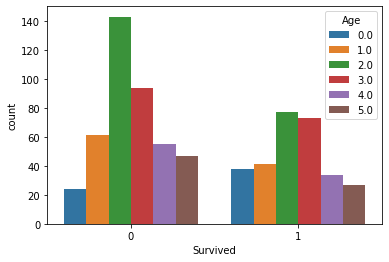

In [17]:
sns.countplot(data=df, x='Survived', hue='Age')

In [18]:
df_test["FamilySIze"]=df_test["SibSp"]+df_test["Parch"]
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySIze
0,892,3,"Kelly, Mr. James",male,3.0,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,4.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,5.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,2.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,2.0,1,1,3101298,12.2875,NaN,S,2


In [19]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySIze       0
dtype: int64

In [20]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
FamilySIze       0
dtype: int64

In [21]:
#Fare의 빈칸을 평균으로 바꾸기

df["Fare"]=df["Fare"].fillna(df["Fare"].mean())
df_test["Fare"]=df_test["Fare"].fillna(df_test["Fare"].mean())

sum(df["Fare"].isnull())

0

In [22]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
df["Embarked"]=df["Embarked"].fillna("S")
df_test["Embarked"]=df_test["Embarked"].fillna("S")

In [24]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
FamilySIze       0
dtype: int64

In [25]:
df.loc[df["Sex"]=="male","Sex"]=0
df.loc[df["Sex"]=="female","Sex"]=1

In [26]:
df_test.loc[df_test["Sex"]=="male","Sex"]=0
df_test.loc[df_test["Sex"]=="female","Sex"]=1

In [27]:
df.loc[df["Embarked"]=="S","Embarked"]=0
df.loc[df["Embarked"]=="C","Embarked"]=1
df.loc[df["Embarked"]=="Q","Embarked"]=2

In [28]:
df_test.loc[df_test["Embarked"]=="S","Embarked"]=0
df_test.loc[df_test["Embarked"]=="C","Embarked"]=1
df_test.loc[df_test["Embarked"]=="Q","Embarked"]=2

In [29]:
df.Cabin=df.Cabin.str[0]

In [30]:
df.Cabin.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [31]:
df["Cabin"]=df["Cabin"].fillna('C')

In [32]:
df_test.Cabin=df_test.Cabin.str[0]
df_test["Cabin"]=df_test["Cabin"].fillna('C')

In [33]:
df["Cabin"]=df["Cabin"].map({
    'C':0,
    'B':1,
    'D':2,
    'E':3,
    'A':4,
    'F':5,
    'G':6,
    'T':7
})

In [34]:
df_test["Cabin"]=df_test["Cabin"].map({
    'C':0,
    'B':1,
    'D':2,
    'E':3,
    'A':4,
    'F':5,
    'G':6,
    'T':7
})

In [35]:
df.loc[df["Name"].str.contains('Mr\.'),"Name"]='Mr'
df.loc[df["Name"].str.contains('Mrs\.'),"Name"]='Mrs'
df.loc[df["Name"].str.contains('Miss\.'),"Name"]='Miss'

In [36]:
df_test.loc[df_test["Name"].str.contains('Mr\.'),"Name"]='Mr'
df_test.loc[df_test["Name"].str.contains('Mrs\.'),"Name"]='Mrs'
df_test.loc[df_test["Name"].str.contains('Miss\.'),"Name"]='Miss'

In [37]:
df["Name"]=df["Name"].map({
    'Mr':0,
    'Mrs':1,
    'Miss':2,
})

In [38]:
df_test["Name"]=df_test["Name"].map({
    'Mr':0,
    'Mrs':1,
    'Miss':2,
})

In [39]:
df.loc[(df["Name"].isnull()) & (df["Sex"]==0),"Name"]=0
df.loc[(df["Name"].isnull()) & (df["Sex"]==1) & (df["Age"]>2),"Name"]=1
df.loc[(df["Name"].isnull()) & (df["Sex"]==1) & (df["Age"]<=2),"Name"]=2

In [40]:
df_test.loc[(df_test["Name"].isnull()) & (df_test["Sex"]==0),"Name"]=0
df_test.loc[(df_test["Name"].isnull()) & (df_test["Sex"]==1) & (df_test["Age"]>2),"Name"]=1
df_test.loc[(df_test["Name"].isnull()) & (df_test["Sex"]==1) & (df_test["Age"]<=2),"Name"]=2

In [41]:
df.loc[(df["Name"].isnull()) & (df["Age"].isnull()),"Name"]=0
df_test.loc[(df_test["Name"].isnull()) & (df_test["Age"].isnull()),"Name"]=0

In [42]:
df["Age"]=df["Age"].fillna(df.groupby("Name")["Age"].transform("mean"))

In [43]:
df_test["Age"]=df_test["Age"].fillna(df_test.groupby("Name")["Age"].transform("mean"))

In [44]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
FamilySIze     0
dtype: int64

In [45]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
FamilySIze     0
dtype: int64

In [46]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySIze
0,1,0,3,0.0,0,2.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,1.0,1,3.0,1,0,PC 17599,71.2833,0,1,1
2,3,1,3,2.0,1,2.0,0,0,STON/O2. 3101282,7.9250,0,0,0
3,4,1,1,1.0,1,3.0,1,0,113803,53.1000,0,0,1
4,5,0,3,0.0,0,3.0,0,0,373450,8.0500,0,0,0


## 3. train

In [47]:
train=df[["Survived","Sex","Age","Fare","Embarked","FamilySIze","Cabin","Name","Pclass"]]
test=df_test[["Sex","Age","Fare","Embarked","FamilySIze","Cabin","Name","Pclass"]]

In [82]:
X=train[["Sex","Age","Fare","Embarked","FamilySIze","Cabin","Name","Pclass"]]
y=train["Survived"]

X

,Sex,Age,Fare,Embarked,FamilySIze,Cabin,Name,Pclass
0,0,2.000000,7.2500,0,1,0,0.0,3
1,1,3.000000,71.2833,1,1,0,1.0,1
2,1,2.000000,7.9250,0,0,0,2.0,3
3,1,3.000000,53.1000,0,1,0,1.0,1
4,0,3.000000,8.0500,0,0,0,0.0,3
...,...,...,...,...,...,...,...,...
886,0,2.000000,13.0000,0,0,0,0.0,2
887,1,1.000000,30.0000,0,0,1,2.0,1
888,1,1.753333,23.4500,0,3,0,2.0,3
889,0,2.000000,30.0000,1,0,0,0.0,1


In [83]:
x_test=test[["Sex","Age","Fare","Embarked","FamilySIze","Cabin","Name","Pclass"]]

x_test

,Sex,Age,Fare,Embarked,FamilySIze,Cabin,Name,Pclass
0,0,3.000000,7.8292,2,0,0,0.0,3
1,1,4.000000,7.0000,0,1,0,1.0,3
2,0,5.000000,9.6875,2,0,0,0.0,2
3,0,2.000000,8.6625,0,0,0,0.0,3
4,1,2.000000,12.2875,0,2,0,1.0,3
...,...,...,...,...,...,...,...,...
413,0,2.580488,8.0500,0,0,0,0.0,3
414,1,3.000000,108.9000,1,0,0,1.0,1
415,0,3.000000,7.2500,0,0,0,0.0,3
416,0,2.580488,8.0500,0,0,0,0.0,3


In [84]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid=train_test_split(X, y, test_size=0.2)

print('모든 데이터', df.shape)
print('training set', x_train.shape, y_train.shape)
print('validation set', x_valid.shape, y_valid.shape)
print('test set',x_test.shape)

모든 데이터 (891, 13)
training set (712, 8) (712,)
validation set (179, 8) (179,)
test set (418, 8)


In [85]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression().fit(x_train, y_train)

preds=lr.predict(x_valid)

C:\Users\eunai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 4. 평가

In [66]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, f1_score

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix(y_test, pred) #교차행렬
    accuracy = accuracy_score(y_test , pred) #정확도
    precision = precision_score(y_test , pred) #정밀도
    recall = recall_score(y_test , pred) #재현도
    f1 = f1_score(y_test,pred) #F1스코어
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

In [67]:
get_clf_eval(y_valid, preds)

오차 행렬
[[84 20]
 [21 54]]
정확도: 0.7709, 정밀도: 0.7297, 재현율: 0.7200, F1:0.7248


In [71]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr.predict_proba(x_valid)[:, 1] 

fprs , tprs , thresholds = roc_curve(y_valid, pred_proba_class1)
# 샘플로 10건만 추출하되, 임곗값을 5 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index 10개: [ 0  5 10 15 20 25 30 35 40 45 50 55 60 65 70]
샘플용 10개의 임곗값:  [1.96 0.89 0.74 0.67 0.59 0.53 0.46 0.37 0.28 0.18 0.15 0.11 0.09 0.08
 0.07]
샘플 임곗값별 FPR:  [0.    0.01  0.029 0.058 0.106 0.183 0.202 0.269 0.288 0.385 0.462 0.625
 0.721 0.827 0.894]
샘플 임곗값별 TPR:  [0.    0.267 0.467 0.547 0.6   0.707 0.747 0.8   0.867 0.88  0.92  0.92
 0.947 0.973 1.   ]


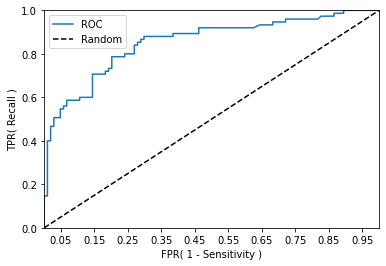

In [73]:
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_valid, lr.predict_proba(x_valid)[:, 1] )

In [74]:
from sklearn.metrics import roc_auc_score

roc_score = roc_auc_score(y_valid, preds)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.7638
